# Adaptive boost - Ada boost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dummy-data.csv")
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Label
0,0.1,0.5,0.8,0.2,0.9,0.3,0.4,0.7,0.6,0.2,-1
1,0.4,0.9,0.2,0.6,0.3,0.5,0.7,0.1,0.8,0.6,-1
2,0.7,0.3,0.6,0.4,0.8,0.2,0.9,0.5,0.1,0.3,1
3,0.9,0.6,0.1,0.8,0.4,0.7,0.2,0.3,0.5,0.9,1
4,0.3,0.2,0.9,0.7,0.1,0.8,0.5,0.4,0.6,0.7,-1


<Axes: xlabel='Label', ylabel='count'>

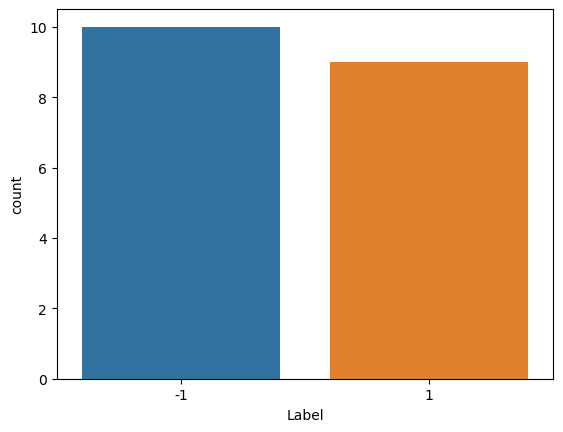

In [3]:
sns.countplot(data=df, x='Label')

## Train and Test splits

In [4]:
X = df.drop('Label', axis=1)
y = df['Label']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Modeling

In [7]:
from sklearn.ensemble import AdaBoostClassifier

In [8]:
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

## Evaluation

In [9]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [10]:
predictions = model.predict(X_test)
predictions

array([-1,  1, -1], dtype=int64)

In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [12]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [13]:
model.feature_importances_.argmax()

8

This is the most important feature

In [14]:
X.columns[8]

'Feature 9'

<Axes: xlabel='Feature 9', ylabel='count'>

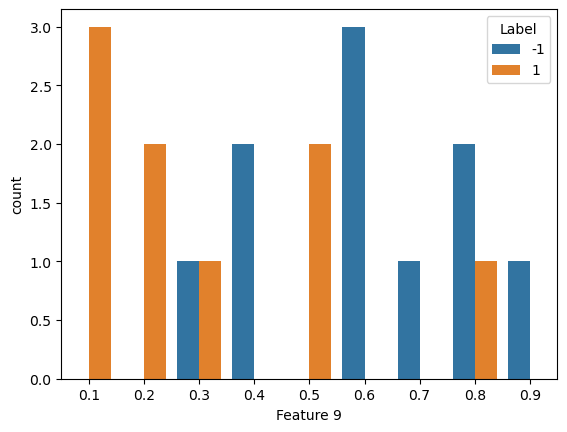

In [15]:
sns.countplot(data=df, x='Feature 9', hue='Label')

## Analyzing performance as more weak learners are added

In [16]:
len(X.columns)

10

In [17]:
error_rates = []

for n in range(1, 11):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

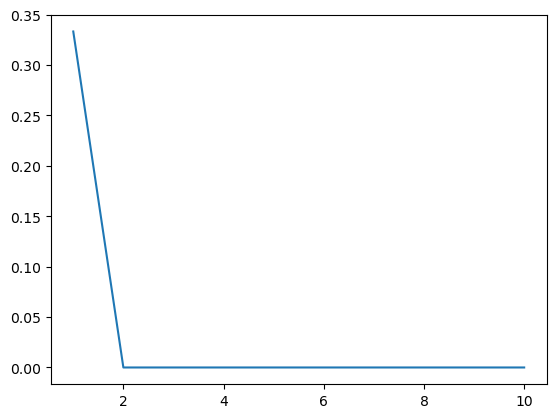

In [18]:
plt.plot(range(1, 11), error_rates)

In [19]:
model.feature_importances_

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5])

In [20]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
feats

,Importance
Feature 1,0.0
Feature 2,0.0
Feature 3,0.0
Feature 4,0.0
Feature 5,0.0
Feature 6,0.0
Feature 7,0.0
Feature 8,0.0
Feature 9,0.5
Feature 10,0.5


In [21]:
imp_feats = feats[feats['Importance'] > 0]
imp_feats

,Importance
Feature 9,0.5
Feature 10,0.5
